In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sciStat
import nafflib

---
# 4D Henon map
---



In [2]:
#------------
nturns = int(1e3)
points = np.array([0.1,0.2,0.3,0.4,0.5])
slope  = 0.35

# Henon parameters:
#---
coupling = 0.1
# Qx = 0.205
Qx = (3-np.sqrt(5))/2
Qy = np.sqrt(2)-1
#------------


particles = []
for point in points:
    
    # Tracking
    x,px,y,py = nafflib.henon_map_4D(point,slope*point,point,slope*point,   Qx = Qx,
                                                                            Qy = Qy,
                                                                            coupling = coupling,
                                                                            num_turns= nturns)
    # Saving
    dct = {'x':x,'px':px,'y':y,'py':py}
    particles.append(dct)


---
# Plotting the particles
---

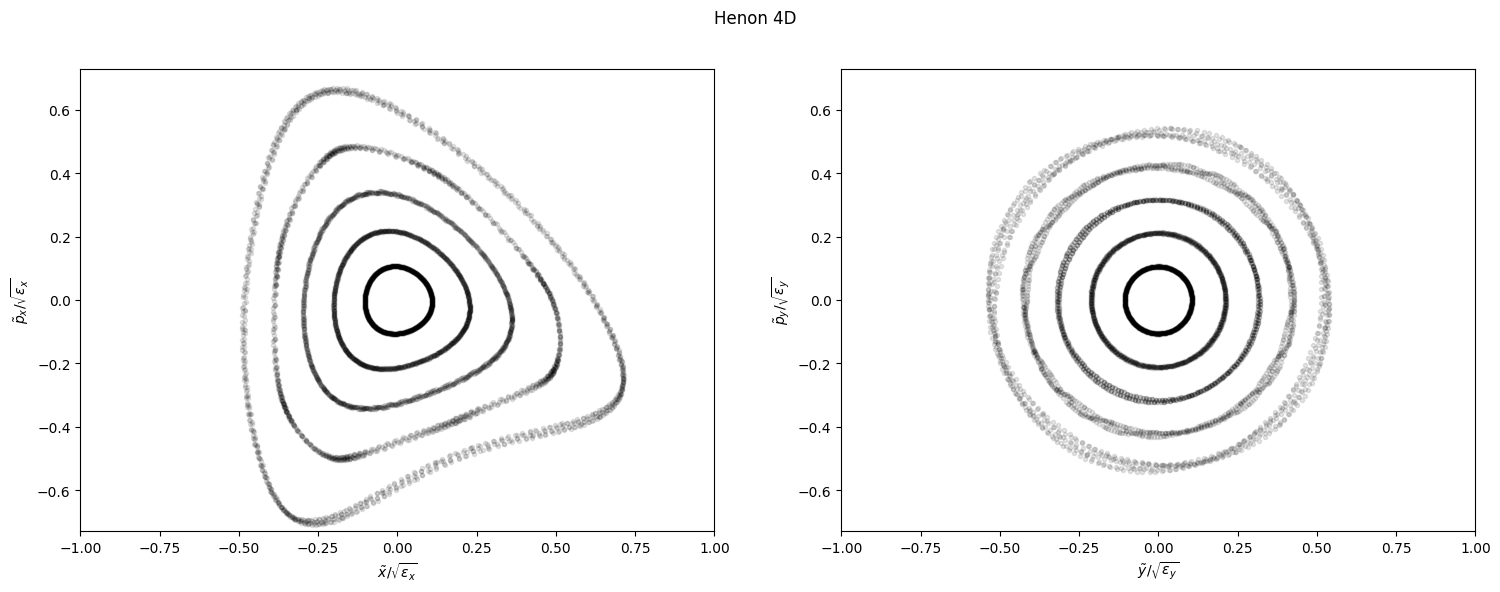

In [3]:


fig, axes = plt.subplots(1, 2, figsize=(18, 6))
plt.suptitle('Henon 4D')
for part in particles:
    for plane,ax in zip(['x','y'],axes):
        plt.sca(ax)
        plt.plot(part[plane],part[f'p{plane}'],'.',color='k',alpha=0.1)

# Adding labels
for plane,ax in zip(['x','y','zeta'],axes):
    plt.sca(ax)
    plt.axis('equal')
    if plane == 'zeta':
        plane = '\zeta'
    plt.xlabel(rf'$\tilde {plane}/\sqrt{{\varepsilon_{plane}}}$')
    plt.ylabel(rf'$\tilde p_{plane}/\sqrt{{\varepsilon_{plane}}}$')
    

    plt.xlim(-1,1)
    plt.ylim(-1,1)



---
# Frequencies as linear combinations?
---

In [4]:
n_harm = 5
plane  = 'x'
for part in particles:
    Q_vec = [nafflib.tune(part[f'{plane}'],part[f'p{plane}'],window_order=2) for plane in ['x','y']]
    spectrum = nafflib.harmonics(part[f'{plane}'],part[f'p{plane}'], num_harmonics = n_harm,window_order=2,to_pandas=True)
    resonances = nafflib.find_linear_combinations(spectrum.frequency,fundamental_tunes= Q_vec,to_pandas=True)
    display(resonances)

,resonance,err,freq
0,"(1, 0, 0)",0.000000e+00,3.816219e-01
1,"(-2, 0, 1)",6.158407e-13,2.367563e-01
2,"(0, 0, 0)",1.638790e-15,-1.638790e-15
3,"(2, 0, -1)",7.244760e-13,-2.367563e-01
4,"(0, -2, 1)",7.275075e-11,1.715505e-01


,resonance,err,freq
0,"(1, 0, 0)",0.000000e+00,3.805474e-01
1,"(-2, 0, 1)",2.843559e-13,2.389051e-01
2,"(0, 0, 0)",3.793911e-16,-3.793911e-16
3,"(2, 0, -1)",3.263223e-13,-2.389051e-01
4,"(-1, 0, 0)",2.668976e-13,-3.805474e-01


,resonance,err,freq
0,"(1, 0, 0)",0.000000e+00,3.785844e-01
1,"(-2, 0, 1)",7.343848e-13,2.428312e-01
2,"(0, 0, 0)",1.312637e-14,1.312637e-14
3,"(2, 0, -1)",6.424028e-13,-2.428312e-01
4,"(-1, 0, 0)",1.241895e-12,-3.785844e-01


,resonance,err,freq
0,"(1, 0, 0)",0.000000e+00,3.752810e-01
1,"(-2, 0, 1)",2.487453e-07,2.494383e-01
2,"(0, 0, 0)",2.705273e-09,2.705273e-09
3,"(2, 0, -1)",2.269154e-07,-2.494383e-01
4,"(-7, 0, 3)",6.799000e-05,3.729653e-01


,resonance,err,freq
0,"(1, 0, 0)",0.000000e+00,3.697933e-01
1,"(-2, 0, 1)",3.156756e-10,2.604133e-01
2,"(0, 0, 0)",1.219630e-11,1.219630e-11
3,"(2, 0, -1)",2.522380e-10,-2.604133e-01
4,"(-1, 0, 0)",3.078282e-10,-3.697933e-01
